In [3]:
import pandas as pd

df = pd.read_csv(r"D:\Course materials\My Projects\Milestone Project 1\Dataset\Electric_Vehicle_Population_Data (1).csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP8D,King,Shoreline,WA,98177.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,32.0,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
1,5YJSA1E45K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
2,WVGUNPE28M,Kitsap,Olalla,WA,98359.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,272118717,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP6H,Thurston,Olympia,WA,98501.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,22.0,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
4,1FADP5CU9G,Thurston,Olympia,WA,98506.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,22.0,171625653,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216767,1G1RB6E44D,Douglas,East Wenatchee,WA,98802.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,12.0,122822822,POINT (-120.29473 47.41515),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
216768,KNDCS3LF9R,Whatcom,Bellingham,WA,98229.0,2024,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,40.0,267143887,POINT (-122.45486 48.7449),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
216769,7SAYGAEE9R,King,Redmond,WA,98052.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,274988388,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
216770,1G1RB6E49D,Pierce,Gig Harbor,WA,98329.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,117353064,POINT (-122.6658 47.38336),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [4]:
# Import necessary libraries
import pandas as pd  # Importing pandas for data manipulation and analysis
import numpy as np  # Importing numpy for numerical operations
import warnings  # Importing warnings to suppress unnecessary warnings

# I am choosing to suppress warnings here to avoid cluttering the output with them.
warnings.filterwarnings('ignore')

# I assume the dataframe 'df' is already loaded earlier in the code
# I want to inspect the structure of the dataset to understand its columns and types
print(df.info())  # This will show the dataframe's summary, including the number of rows, columns, and data types

# Now, I will check for any missing values in the dataset to understand which columns need attention
missing_values = df.isnull().sum()  # This will give the sum of missing (null) values per column
print("Missing values:\n", missing_values)  # I will print out the missing values for each column

# In this case, I am choosing to fill missing values in the 'Postal Code' column with 'Unknown'
df['Postal Code'].fillna('Unknown', inplace=True)  # Filling 'Postal Code' NaN values with 'Unknown' to handle the missing data

# Next, I want to ensure uniform formatting for categorical columns like 'Make' and 'Model'
df['Make'] = df['Make'].str.upper().str.strip()  # I am converting all entries in the 'Make' column to uppercase and removing extra spaces
df['Model'] = df['Model'].str.upper().str.strip()  # I am doing the same for the 'Model' column to make them uniform

# I am investigating rows where the 'Base MSRP' is 0, as it could indicate a data issue or error
zero_msrp = df[df['Base MSRP'] == 0]  # Filtering rows where 'Base MSRP' is equal to 0

# Similarly, I want to check if there are any rows where 'Electric Range' is 0 (which is unlikely to be valid data)
zero_range = df[df['Electric Range'] == 0]  # Filtering rows where 'Electric Range' is equal to 0

# I am choosing to filter out any rows where 'Electric Range' is 0 or negative, as these are likely invalid data points
df = df[df['Electric Range'] > 0]  # Keeping only rows where 'Electric Range' is greater than 0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216772 entries, 0 to 216771
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         216772 non-null  object 
 1   County                                             216767 non-null  object 
 2   City                                               216767 non-null  object 
 3   State                                              216772 non-null  object 
 4   Postal Code                                        216767 non-null  float64
 5   Model Year                                         216772 non-null  int64  
 6   Make                                               216772 non-null  object 
 7   Model                                              216772 non-null  object 
 8   Electric Vehicle Type                              216772 non-null  object

In [8]:
# Importing pandas to work with the dataframe
import pandas as pd


#Calculating missing value correlation for df1

# I will convert missing values in the dataframe 'df' to binary format (1 for missing values, 0 for non-missing values)
missing_data = df.isnull().astype(int)  
# df.isnull() creates a boolean dataframe where 'True' means the value is missing, and 'False' means it is not missing. 
# I then convert this boolean dataframe into integers (True becomes 1, False becomes 0) using astype(int).

# Now, I want to compute the correlation of the missingness between all columns in the dataset
missing_corr = missing_data.corr()  
# Explanation: .corr() computes the correlation matrix for the missing data. The correlation tells us how missing values in one column 
# relate to missing values in another column (e.g., if two columns often have missing values at the same time).

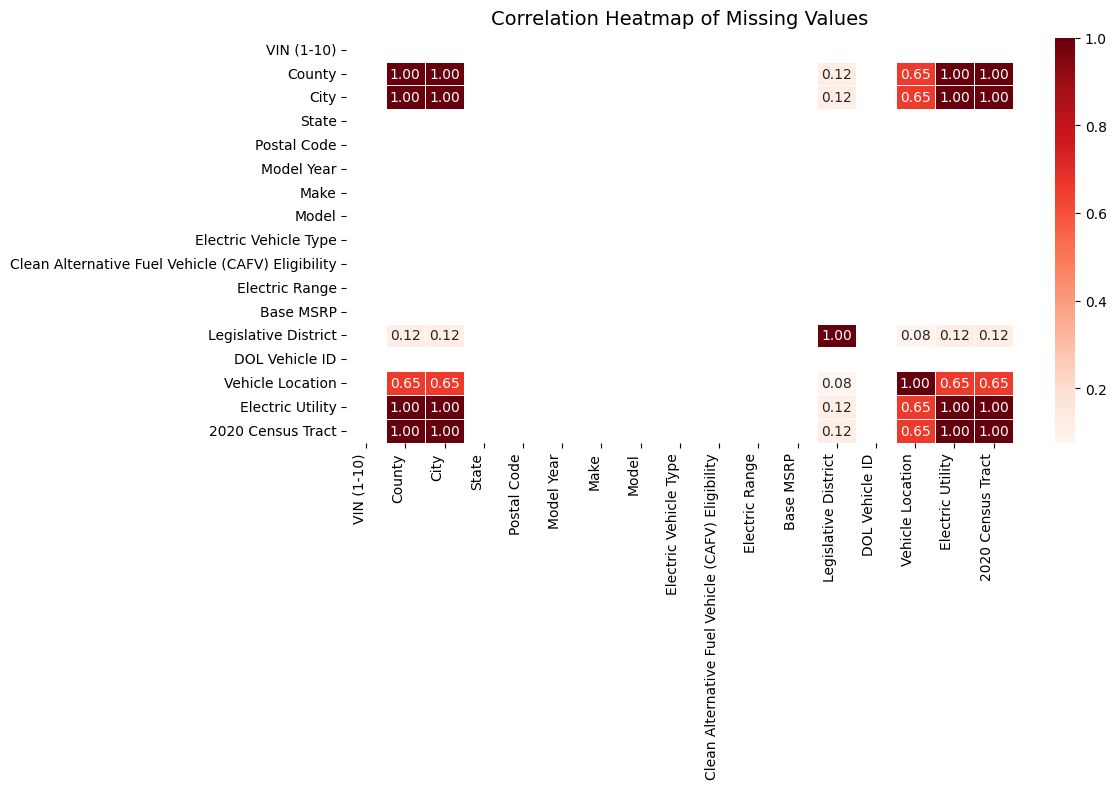

In [9]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt  # Used to create various types of plots, including heatmaps
import seaborn as sns  # Seaborn is built on top of matplotlib and provides a high-level interface for drawing attractive visualizations

# Set the figure size to make the heatmap larger and avoid overlap of labels
plt.figure(figsize=(12, 8))  
# I am adjusting the figure size to 12x8 inches to give the heatmap enough space and avoid the labels overlapping, which helps with readability.

# Create the heatmap with annotations, showing the correlation of missing values
sns.heatmap(missing_corr, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)  
# sns.heatmap() creates the heatmap visualization of the correlation matrix of missing values.
# 'annot=True' adds numerical annotations to each cell, 'cmap="Reds"' sets the color palette to reds (darker values represent stronger correlations),
# 'fmt=".2f"' formats the annotation to two decimal places, and 'linewidths=0.5' adds lines between cells for clarity.

# Rotate the x-axis and y-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=10)  
# I am rotating the x-axis labels by 90 degrees to ensure they don’t overlap with each other. 'ha="right"' aligns them to the right.
# I also set the font size to 10 for better readability.

plt.yticks(fontsize=10)  
# I am setting the font size of the y-axis labels to 10 to make them consistent with the x-axis labels.

# Add a title to the heatmap
plt.title('Correlation Heatmap of Missing Values', fontsize=14, pad=10)  
# I am adding a title to the heatmap for context. The title is set to a font size of 14, and 'pad=10' adds some padding above the title for better spacing.

# Ensure everything fits within the figure layout
plt.tight_layout()  
# This adjusts the layout to make sure that nothing (like labels, title, or the heatmap itself) is cut off from the figure.

# Save the heatmap as a PNG file with high resolution (300 dpi) to the specified file path
save_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution.png"  # Change this path as needed
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Save the figure as a PNG file with high resolution and ensures everything fits within the figure.

# Show the heatmap on the screen
plt.show()  
# Finally, I display the heatmap using plt.show(). This pops up a window with the heatmap visualization.



# Barplot

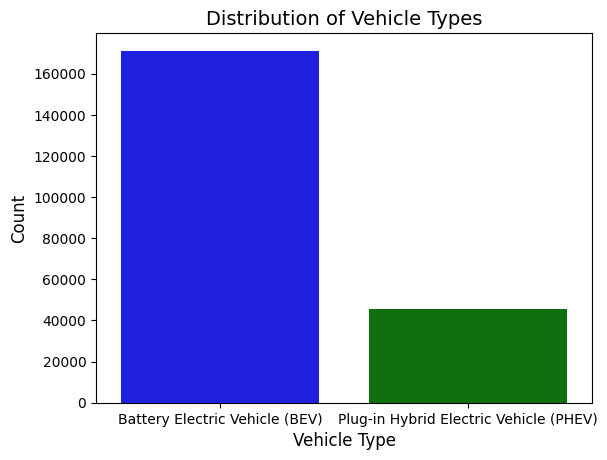

In [42]:
# Import necessary libraries for data visualization
import seaborn as sns  # Seaborn is a high-level interface for drawing attractive statistical graphics
import matplotlib.pyplot as plt  # Matplotlib is a library for creating static, animated, and interactive visualizations in Python
import warnings  # Warnings library is used to handle and filter warning messages
warnings.filterwarnings('ignore')  # Suppressing warnings to avoid unnecessary clutter in the output

# Calculate the count of each type of electric vehicle (BEV vs PHEV) in the dataset
vehicle_type_counts = df['Electric Vehicle Type'].value_counts().reset_index()  
# 'value_counts()' counts the occurrences of each unique value in the 'Electric Vehicle Type' column.
# 'reset_index()' turns the resulting series into a DataFrame for easier handling.

# Rename the columns for clarity
vehicle_type_counts.columns = ['Electric Vehicle Type', 'Count']  
# Renaming the columns so it's clear that the first column is the vehicle type and the second one is the count.

# Create a color palette to differentiate between BEVs and PHEVs
palette = {'Battery Electric Vehicle (BEV)': 'blue', 
           'Plug-in Hybrid Electric Vehicle (PHEV)': 'green'}  
# Defining a custom color palette: 'BEV' will be blue, and 'PHEV' will be green.

# Create the bar plot with 'hue' to assign colors based on the 'Electric Vehicle Type'
sns.barplot(x='Electric Vehicle Type', y='Count', data=vehicle_type_counts, palette=palette)  
# sns.barplot() is used to create the bar plot. 
# The 'x' axis represents 'Electric Vehicle Type', and the 'y' axis represents 'Count'.
# The 'palette' argument ensures that BEVs and PHEVs are color-coded according to the custom palette.

# Add title and axis labels to the plot
plt.title('Distribution of Vehicle Types', fontsize=14)  
# Adding a title with a font size of 14 for clarity.

plt.ylabel('Count', fontsize=12)  
# Labeling the y-axis as 'Count' with a font size of 12.

plt.xlabel('Vehicle Type', fontsize=12)  
# Labeling the x-axis as 'Vehicle Type' with a font size of 12.

# Save the plot as an image with a specified path
save_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution8.png"  # Change this path as needed
plt.savefig(save_path, dpi=300, bbox_inches='tight')  
# Saving the plot to the specified file path. 'dpi=300' ensures high resolution, and 'bbox_inches="tight"' makes sure the plot fits within the figure's boundaries.

# Display the plot on the screen
plt.show()  
# Displaying the plot so it can be visually inspected.


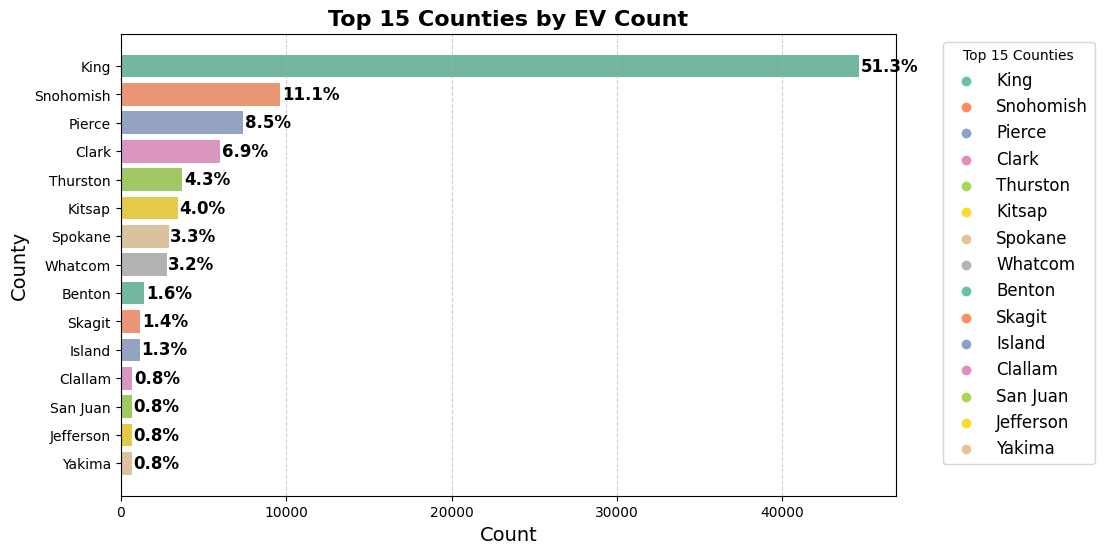

In [7]:
# Import necessary libraries for data visualization
import seaborn as sns  # Seaborn is a high-level interface for drawing attractive statistical graphics
import matplotlib.pyplot as plt  # Matplotlib is used to create static, animated, and interactive visualizations

# Count the number of electric vehicles (EVs) by County
ev_count_by_county = df['County'].value_counts()  
# 'value_counts()' counts the occurrences of each unique value in the 'County' column to show the number of EVs in each county.

# Set a more diverse color palette (e.g., 'Set2' for 15 distinct colors)
palette = sns.color_palette("Set2", n_colors=15)  
# Using 'Set2', a color palette from Seaborn that provides a diverse set of colors, with 15 distinct colors for the counties.

# Create the bar plot for the top 15 counties
plt.figure(figsize=(10, 6))  # Adjusting the figure size for better readability
barplot = sns.barplot(y=ev_count_by_county.index[:15], x=ev_count_by_county.values[:15], palette=palette, ci=None)  
# sns.barplot() is used to create the bar plot. The top 15 counties are selected using .index[:15] and .values[:15].
# The 'palette' argument specifies the color palette, and 'ci=None' removes the confidence intervals around the bars.

# Calculate the total count of EVs for the top 15 counties to compute percentage
total_count = ev_count_by_county.values[:15].sum()  
# Summing the values of the top 15 counties to get the total count, which will be used to calculate percentages.

# Add percentage labels on the bars for each county
for i, count in enumerate(ev_count_by_county.values[:15]):  
    percentage = (count / total_count) * 100  # Calculating the percentage of each county's EV count relative to the total count
    plt.text(count + 100, i, f'{percentage:.1f}%', va='center', fontsize=12, color='black', fontweight='bold')  
    # Adding the percentage label to each bar with some offset from the bar. The 'va' argument centers the label vertically.
    # I am using a font size of 12, setting the color to black, and making the text bold for better visibility.

# Set the title and axis labels with improved font size
plt.title('Top 15 Counties by EV Count', fontsize=16, fontweight='bold')  
# Adding a bold title with a font size of 16.

plt.xlabel('Count', fontsize=14)  
# Labeling the x-axis as 'Count' with a font size of 14.

plt.ylabel('County', fontsize=14)  
# Labeling the y-axis as 'County' with a font size of 14.

# Add gridlines for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.6)  
# Adding gridlines to the x-axis for better readability. I am using dashed lines and setting the transparency (alpha) to 0.6.

# Add a legend using county names for better context
for i in range(15):  
    plt.scatter([], [], color=palette[i], label=ev_count_by_county.index[i])  # Create a placeholder scatter plot for each county

# Display the legend on the plot
plt.legend(title="Top 15 Counties", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  
# Setting the legend title and positioning it outside the plot (to the right) for clarity. The 'fontsize' argument adjusts the legend text size.

# Save the plot as an image to a specified path
image_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution1.png"  
plt.savefig(image_path, bbox_inches='tight')  
# Saving the plot to the specified file path. 'bbox_inches="tight"' ensures that the entire plot, including labels, fits within the saved image.

# Show the plot
plt.show()  
# Displaying the plot on the screen so that I can visually inspect it.



# Sliced pie chart

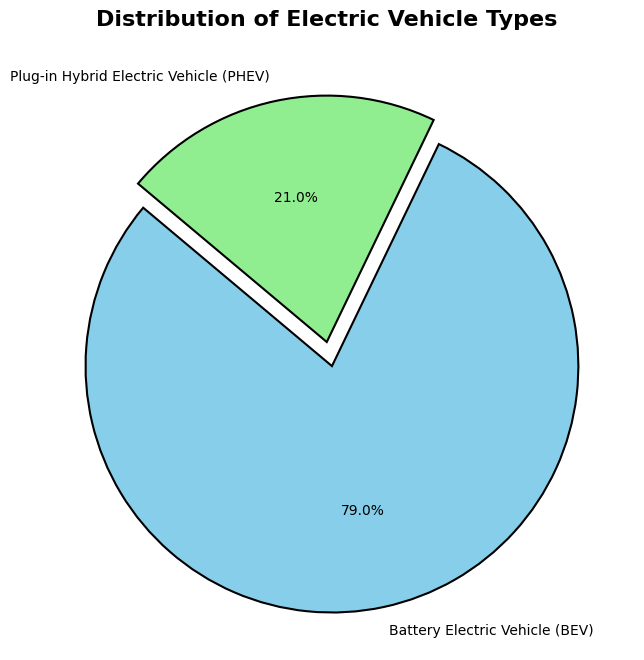

In [40]:
# Importing necessary library for visualization
import matplotlib.pyplot as plt  # Matplotlib is used for creating static, animated, and interactive visualizations

# Count the occurrences of each Electric Vehicle Type in the dataset
ev_type_counts = df['Electric Vehicle Type'].value_counts()  
# 'value_counts()' counts the occurrences of each unique value in the 'Electric Vehicle Type' column.

# Prepare the labels and sizes for the pie chart
labels = ev_type_counts.index  # The labels will be the unique vehicle types
sizes = ev_type_counts.values  # The sizes will be the counts of each vehicle type
colors = ['skyblue', 'lightgreen', 'orange', 'grey']  # A list of customizable colors for each slice of the pie chart

# Adjust the 'explode' argument to highlight the first slice
explode = [0.1 if i == 0 else 0 for i in range(len(sizes))]  
# 'explode' highlights the first slice (by offsetting it slightly from the rest). Here, only the first slice is exploded by 0.1.

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size for a square aspect ratio (8x8 inches)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})  
# 'sizes' represent the count of each Electric Vehicle Type. 
# 'autopct="%1.1f%%"' formats the percentage displayed on the pie chart slices to one decimal point.
# 'startangle=140' rotates the pie chart to make the first slice start at 140 degrees.
# 'colors' assigns custom colors to the pie slices, and 'explode' separates the first slice.
# 'wedgeprops' adds black edges to the slices with a linewidth of 1.5 for better visual separation.

# Add title to the pie chart
plt.title('Distribution of Electric Vehicle Types', fontsize=16, fontweight='bold')  
# Setting the title of the pie chart with a bold font and size of 16.

# Save the pie chart as an image file
image_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution2.png"  
plt.savefig(image_path, bbox_inches='tight')  # Save the pie chart to the specified path with tight bounding box to avoid cutting off labels

# Show the pie chart
plt.show()  
# Displaying the pie chart to visually inspect the distribution of electric vehicle types.




# KDE Analysis

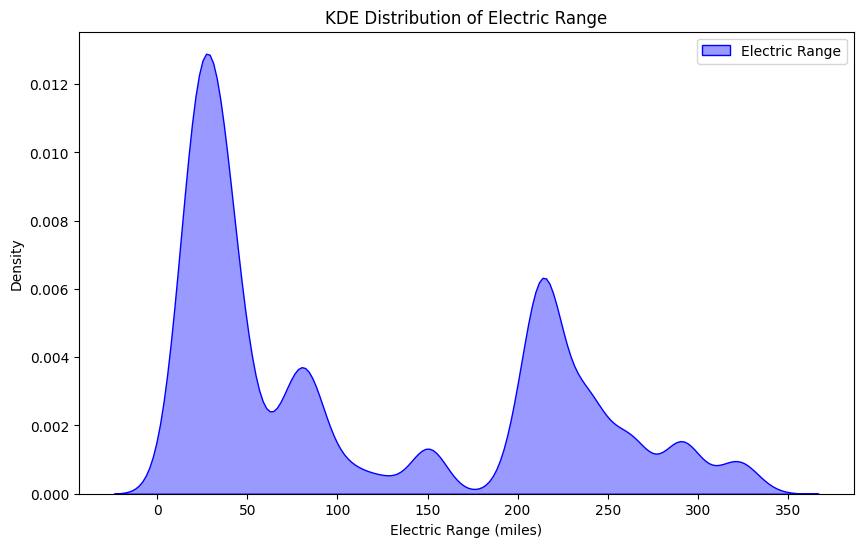

In [13]:
# Import necessary library for data visualization
import seaborn as sns  # Seaborn is used for statistical data visualization, such as plotting the KDE plot

# Create a KDE plot (Kernel Density Estimate) for the 'Electric Range' column
plt.figure(figsize=(10, 6))  # Adjusting the figure size for a better view (10 inches wide and 6 inches tall)
sns.kdeplot(df['Electric Range'], fill=True, color='blue', alpha=0.4, label='Electric Range')  
# 'sns.kdeplot()' creates a KDE plot.
# The 'fill=True' argument fills the area under the curve.
# The 'color' argument sets the color of the plot to blue, and 'alpha=0.4' makes the color semi-transparent.
# 'label' sets the label for the plot to be used in the legend.

# Set the title, labels, and legend for the plot
plt.title('KDE Distribution of Electric Range')  
# Adding a title with the text 'KDE Distribution of Electric Range'.

plt.xlabel('Electric Range (miles)')  
# Labeling the x-axis as 'Electric Range (miles)', which indicates the range in miles.

plt.ylabel('Density')  
# Labeling the y-axis as 'Density', which indicates the density of the data at various points of electric range.

plt.legend()  
# Displaying the legend on the plot to show the label associated with the KDE plot.

# Save the plot as an image to the specified path
image_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution3.png"  
plt.savefig(image_path, bbox_inches='tight')  
# Saving the plot as a PNG file to the specified path. 'bbox_inches="tight"' ensures that all elements of the plot are included without cutting off.

# Display the plot
plt.show()  
# Displaying the plot to visually inspect the KDE distribution of Electric Range.


# Bar chart Top 15 Vehicle Manufacturers

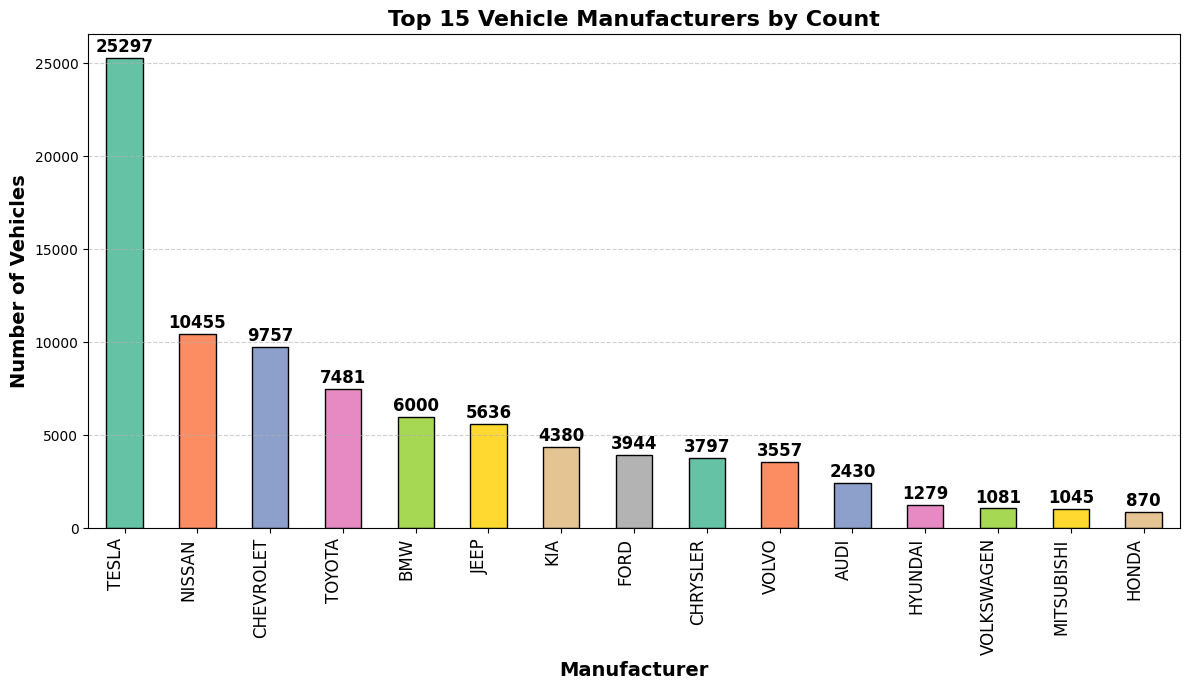

In [14]:
# Import necessary library for visualization
import matplotlib.pyplot as plt  # Matplotlib is used to create static, animated, and interactive visualizations

# Count the occurrences of each manufacturer (vehicle make) in the dataset
make_counts = df['Make'].value_counts()  
# 'value_counts()' counts the occurrences of each unique value in the 'Make' column, which represents vehicle manufacturers.

# Create a bar chart to visualize the top 15 manufacturers by count
plt.figure(figsize=(12, 7))  # Adjust the figure size to be wider for better spacing and readability
make_counts.head(15).plot(kind='bar', color=sns.color_palette("Set2", 15), edgecolor='black')  
# 'head(15)' gets the top 15 manufacturers with the highest counts.
# 'kind='bar'' specifies that we want to create a bar chart.
# 'color' assigns a custom color palette to the bars, 'sns.color_palette("Set2", 15)' selects 15 distinct colors from the 'Set2' palette.
# 'edgecolor='black'' adds black edges around each bar for better visual distinction.

# Add a title and axis labels with improved font sizes
plt.title('Top 15 Vehicle Manufacturers by Count', fontsize=16, fontweight='bold')  
# Title of the chart with bold font and font size of 16.

plt.xlabel('Manufacturer', fontsize=14, fontweight='bold')  
# Labeling the x-axis as 'Manufacturer' with a bold font size of 14.

plt.ylabel('Number of Vehicles', fontsize=14, fontweight='bold')  
# Labeling the y-axis as 'Number of Vehicles' with a bold font size of 14.

# Add gridlines for better readability of the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.6)  
# Adding dashed gridlines for the y-axis. The transparency ('alpha=0.6') makes them subtle.

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)  
# Rotating the x-tick labels by 45 degrees for better visibility and aligning them to the right. Font size is set to 12.

# Annotate the bars with counts for clarity
for i, count in enumerate(make_counts.head(15).values):  
    plt.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')  
    # Adding a text label above each bar with the count of vehicles.
    # 'i' is the index of the bar (x-position), and 'count' is the value at that position (the count of vehicles for that manufacturer).
    # The '+ 100' ensures that the label is positioned slightly above the bar.
    # 'ha' and 'va' control horizontal and vertical alignment, respectively.
    # Font size and color are set for visibility, and the font is made bold.

# Adjust the x-tick labels to be fully horizontal
plt.xticks(rotation=90)  
# Rotating the x-tick labels by 90 degrees for optimal visibility if the labels are too long.

plt.tight_layout()  # Ensures that there is no clipping of labels or other plot elements
# 'tight_layout' adjusts the layout to make sure the labels and other elements fit well within the figure without overlapping.

# Save the plot as an image
image_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution4.png"  
plt.savefig(image_path, bbox_inches='tight')  
# Saving the plot to the specified image path. 'bbox_inches="tight"' ensures that the entire plot fits into the saved image.

# Display the plot
plt.show()  
# Displaying the bar chart to visually inspect the top 15 vehicle manufacturers and their counts.



In [15]:
# Assuming your main DataFrame is called 'df'

# Filter the DataFrame to exclude rows with missing 'Make' values
filtered_df = df[df['Make'].notna()]  
# 'df['Make'].notna()' returns a boolean series where True represents rows where 'Make' is not NaN.
# The DataFrame is then filtered to include only those rows where the 'Make' column has a non-null value.

# Get all unique vehicle makes from the filtered DataFrame
unique_makes = filtered_df['Make'].unique()  
# 'unique()' returns an array of all unique values present in the 'Make' column of the filtered DataFrame.

# Now, can proceed with our code here to further analyze or use the 'unique_makes' array
print(unique_makes)  
# This will print the unique vehicle makes from the filtered DataFrame.



['NISSAN' 'TESLA' 'TOYOTA' 'FORD' 'JEEP' 'BMW' 'KIA' 'VOLKSWAGEN'
 'CHRYSLER' 'HONDA' 'CHEVROLET' 'AUDI' 'FIAT' 'MAZDA' 'PORSCHE' 'POLESTAR'
 'VOLVO' 'HYUNDAI' 'MINI' 'MERCEDES-BENZ' 'MITSUBISHI' 'SMART' 'CADILLAC'
 'ALFA ROMEO' 'LINCOLN' 'LEXUS' 'SUBARU' 'JAGUAR' 'LAND ROVER' 'DODGE'
 'TH!NK' 'FISKER' 'BENTLEY' 'AZURE DYNAMICS' 'WHEEGO ELECTRIC CARS']


In [16]:
# Get the unique makes from the filtered dataset
unique_makes = filtered_df['Make'].unique()  
# This step extracts all unique vehicle makes from the 'Make' column of the filtered DataFrame, excluding any rows with missing values.

# Initialize a dictionary to store the insights for comparison
insights = {}  
# An empty dictionary is created to store the counts of BEVs and PHEVs for each make.

# Iterate through each make and analyze the data
for make in unique_makes:  
    # For each unique vehicle make, filter the data to get rows where the 'Make' is equal to the current make.
    make_data = filtered_df[filtered_df['Make'] == make]  
    
    # Count the number of BEVs and PHEVs for the current make
    ev_type_counts = make_data['Electric Vehicle Type'].value_counts()  
    # 'value_counts()' counts how many times each electric vehicle type (e.g., BEV, PHEV) appears for the current make.
    
    # Store the insights in the dictionary
    insights[make] = ev_type_counts  
    # The counts for the current make are stored in the dictionary, with the vehicle make as the key.

# Convert the insights dictionary into a DataFrame for easy comparison
insight_df = pd.DataFrame(insights).T.fillna(0)  
# The dictionary is converted to a DataFrame. The `.T` transposes the dictionary so that each row corresponds to a manufacturer (make),
# and each column corresponds to a type of electric vehicle (BEV, PHEV). 
# '.fillna(0)' ensures that any missing values (if a manufacturer does not have a certain type of EV) are filled with 0.

# Now 'insight_df' will contain the comparison between BEVs and PHEVs for each make, with 0 for missing counts.



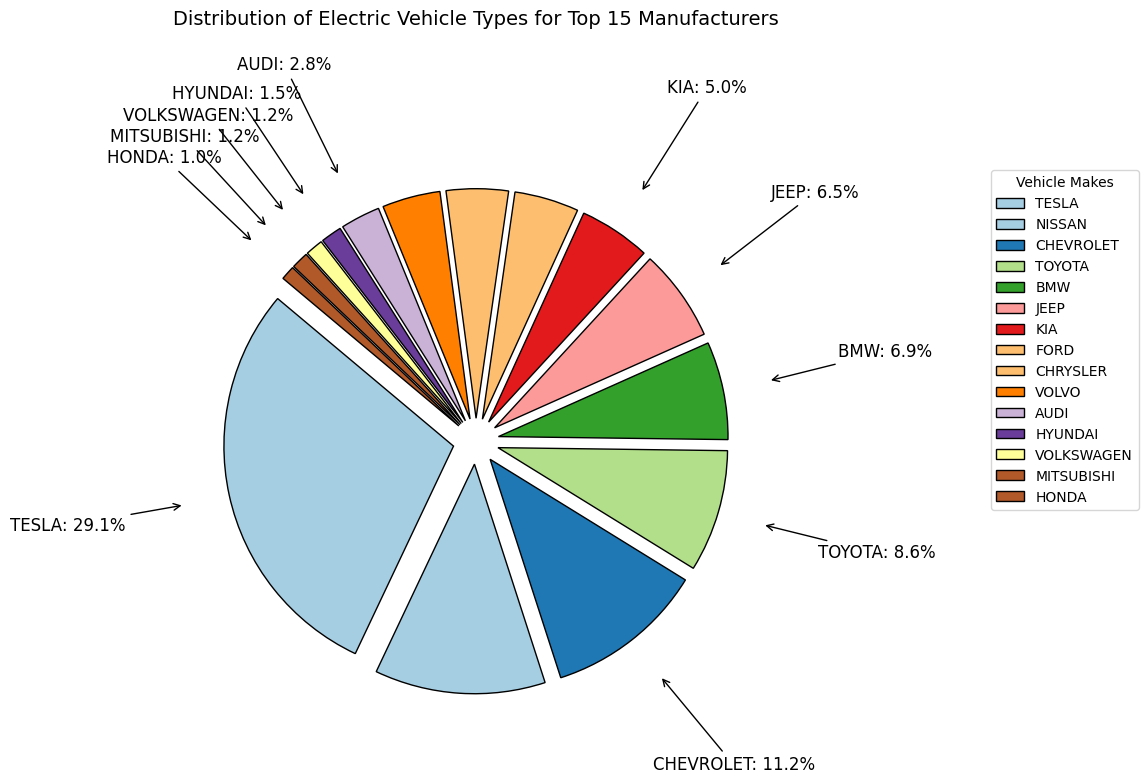

Image saved at: D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution_with_legend.png


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# I calculate the top 15 manufacturers by count of vehicles
top_15_makes = filtered_df['Make'].value_counts().head(15)

# I prepare the data for the pie chart
sizes_fixed = top_15_makes.values  # These are the counts of vehicles per manufacturer
labels_fixed = top_15_makes.index  # These are the names of the manufacturers
colors_fixed = plt.cm.Paired(np.linspace(0, 1, len(labels_fixed)))  # I assign distinct colors to each manufacturer

# I create the pie chart and adjust the figure size for better visibility
plt.figure(figsize=(12, 8))

# I draw the pie chart without auto labels and position the labels outside the chart
# I also add some 'explode' to highlight each slice
wedges, texts = plt.pie(sizes_fixed, labels=None, startangle=140, colors=colors_fixed, 
                        explode=[0.1]*len(labels_fixed), wedgeprops={'edgecolor': 'black'}, 
                        pctdistance=0.75, labeldistance=1.2, textprops={'fontsize': 10})

# Now I manually add the labels and percentages to each slice
for i, wedge in enumerate(wedges):
    # I calculate the angle for each wedge to position the label properly
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 1.3 * np.cos(np.radians(angle))  # I calculate the x-coordinate for the label position
    y = 1.3 * np.sin(np.radians(angle))  # I calculate the y-coordinate for the label position
    
    # I calculate the percentage for each slice
    percentage = sizes_fixed[i] / sum(sizes_fixed) * 100
    
    # I combine the manufacturer name with the percentage and format it nicely
    label_with_percentage = f"{labels_fixed[i]}: {percentage:.1f}%"
    
    # I annotate the chart with the label and percentage
    plt.annotate(label_with_percentage, xy=(x, y), xytext=(x*1.4, y*1.4), ha='center', fontsize=12,
                 arrowprops=dict(arrowstyle="->", color='black'))  # I add an arrow pointing to the label

# I add a legend with the vehicle manufacturers for clarity
plt.legend(title='Vehicle Makes', loc='upper left', bbox_to_anchor=(1.05, 1), labels=labels_fixed, fontsize=10)

# I set a title for the pie chart to explain what it represents
plt.title('Distribution of Electric Vehicle Types for Top 15 Manufacturers', fontsize=14, pad=100)

# I set equal aspect ratio to ensure the pie chart is circular
plt.axis('equal')  

# I adjust the layout to prevent overlapping elements
plt.tight_layout()  

# I save the pie chart as an image with tight bounding to ensure no clipping of the content
image_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution_with_legend.png"
plt.savefig(image_path, bbox_inches='tight')

# I display the pie chart on the screen
plt.show()

# Optionally, I print the path where the image is saved for reference
print(f"Image saved at: {image_path}")



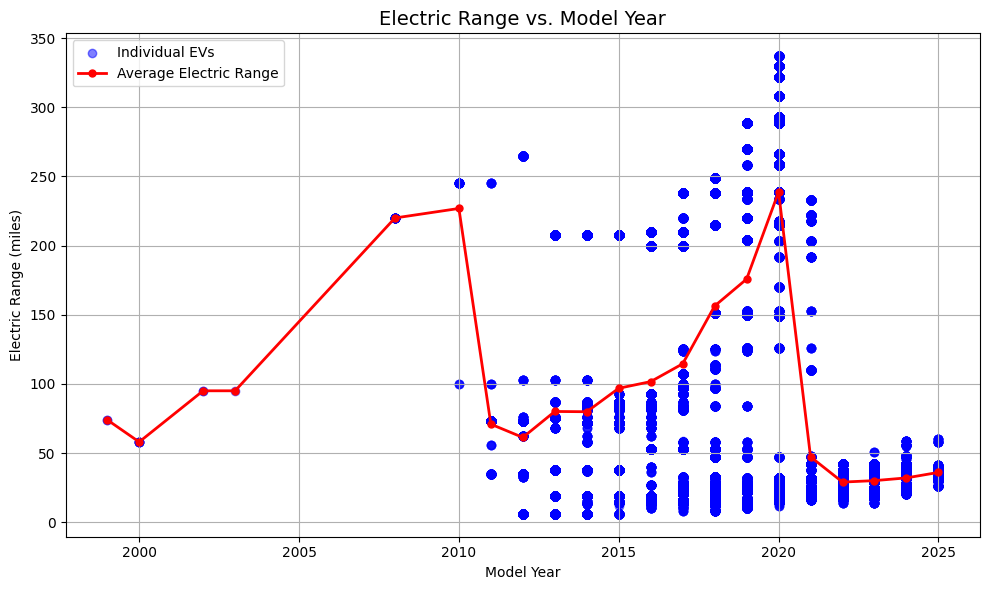

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the EV data
# First, I make sure that the 'Electric Range' and 'Model Year' columns exist in the DataFrame
# and remove rows where these values are missing, as I can't plot incomplete data.
df_clean = df.dropna(subset=['Electric Range', 'Model Year'])

# Step 1: Create a scatter plot to visualize the relationship between Electric Range and Model Year
# In this step, I plot the individual electric vehicles with their model year on the x-axis
# and electric range on the y-axis, using blue color for the points and setting their transparency to 0.5.
plt.figure(figsize=(10, 6))  # I set the figure size to make the plot more readable.
plt.scatter(df_clean['Model Year'], df_clean['Electric Range'], alpha=0.5, color='blue', label='Individual EVs')

# Step 2: Optional - Add a line plot to show the trend of average electric range over the years
# To do this, I calculate the average electric range for each model year using 'groupby' and 'mean'.
avg_range_by_year = df_clean.groupby('Model Year')['Electric Range'].mean().reset_index()

# Now, I plot the average electric range with a red line and circular markers to indicate the trend.
plt.plot(avg_range_by_year['Model Year'], avg_range_by_year['Electric Range'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Average Electric Range')

# Step 3: Add title, axis labels, and grid for better readability
# Here, I add a title to the plot and label the x-axis (Model Year) and y-axis (Electric Range).
plt.title('Electric Range vs. Model Year', fontsize=14)  # I specify the font size for the title.
plt.xlabel('Model Year')  # Labeling the x-axis as Model Year.
plt.ylabel('Electric Range (miles)')  # Labeling the y-axis as Electric Range in miles.
plt.grid(True)  # I add gridlines for better readability of the plot.

# Step 4: Add a legend to distinguish between the scatter points and the trend line
# The legend helps to identify the two plot elements: individual EVs and average electric range.
plt.legend()

# Step 5: Display the plot
# Before displaying, I adjust the layout to ensure everything fits neatly within the plot.
plt.tight_layout()

# I save the plot to a specified image path to ensure that I have a file copy of the plot.
image_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution16.png"
plt.savefig(image_path, bbox_inches='tight')  # Saving with tight bounding box to avoid clipping.

# Finally, I display the plot.
plt.show()


In [10]:
#Now i have imported the Second Dataset which also helps our CLient to understand the population and need of EV's in the World
import pandas as pd

df1 = pd.read_csv(r"D:\Course materials\My Projects\Milestone Project 1\Dataset\Electric_Vehicle_Population_Size_History_By_County.csv")
df1

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,April 30 2018,Chelan,WA,Truck,0,0,0,21759,21759,0.00
1,May 31 2019,Virginia Beach,VA,Passenger,1,1,2,704,706,0.28
2,November 30 2018,Montgomery,AL,Passenger,1,0,1,49,50,2.00
3,July 31 2023,Essex,NJ,Passenger,2,0,2,8,10,20.00
4,August 31 2022,Lexington,SC,Passenger,1,0,1,23,24,4.17
...,...,...,...,...,...,...,...,...,...,...
23938,May 31 2019,Juneau,AK,Passenger,0,2,2,35,37,5.41
23939,January 31 2017,Loudoun,VA,Passenger,0,1,1,90,91,1.10
23940,December 31 2020,Flathead,MT,Passenger,2,0,2,60,62,3.23
23941,May 31 2023,Anchorage,AK,Passenger,1,0,1,113,114,0.88


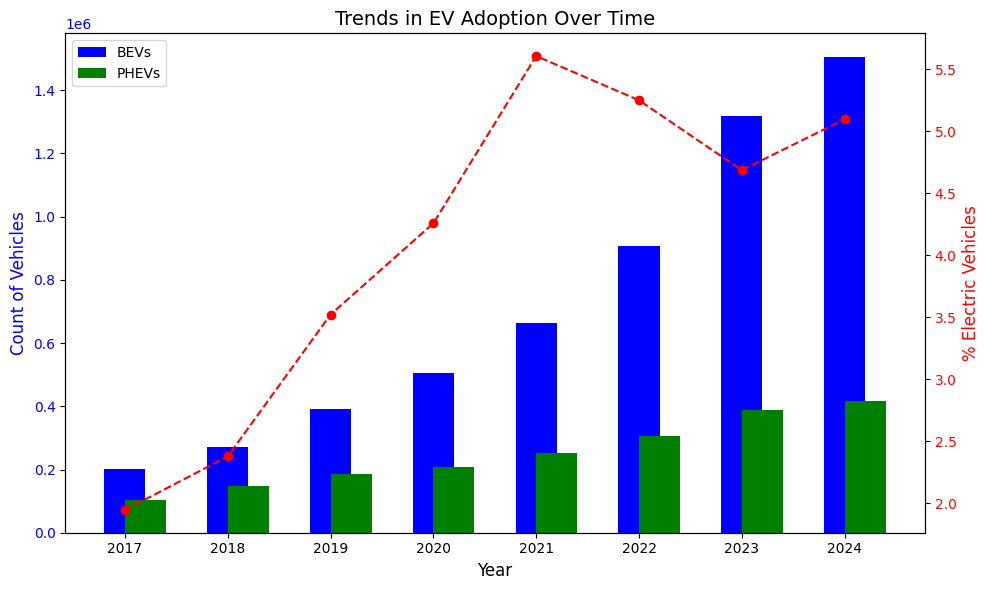

In [19]:

import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' to datetime
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Extract the year
df1['Year'] = df1['Date'].dt.year

# Grouping data by year
yearly_trends = df1.groupby('Year').agg({
    'Battery Electric Vehicles (BEVs)': 'sum',
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'sum',
    'Percent Electric Vehicles': 'mean'
}).reset_index()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot BEVs and PHEVs as bars
ax1.bar(yearly_trends['Year'], yearly_trends['Battery Electric Vehicles (BEVs)'],
         width=0.4, label='BEVs', color='blue', align='center')
ax1.bar(yearly_trends['Year'], yearly_trends['Plug-In Hybrid Electric Vehicles (PHEVs)'],
         width=0.4, label='PHEVs', color='green', align='edge')

# Set axis labels and title
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Count of Vehicles", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add legend
ax1.legend(loc='upper left')

# Create secondary axis for Percent Electric Vehicles
ax2 = ax1.twinx()
ax2.plot(yearly_trends['Year'], yearly_trends['Percent Electric Vehicles'],
         marker='o', label="% Electric Vehicles", color='red', linestyle='--')
ax2.set_ylabel("% Electric Vehicles", fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title("Trends in EV Adoption Over Time", fontsize=14)
fig.tight_layout()
image_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution10.png"
plt.savefig(image_path, bbox_inches='tight')

# Show the plot
plt.show()


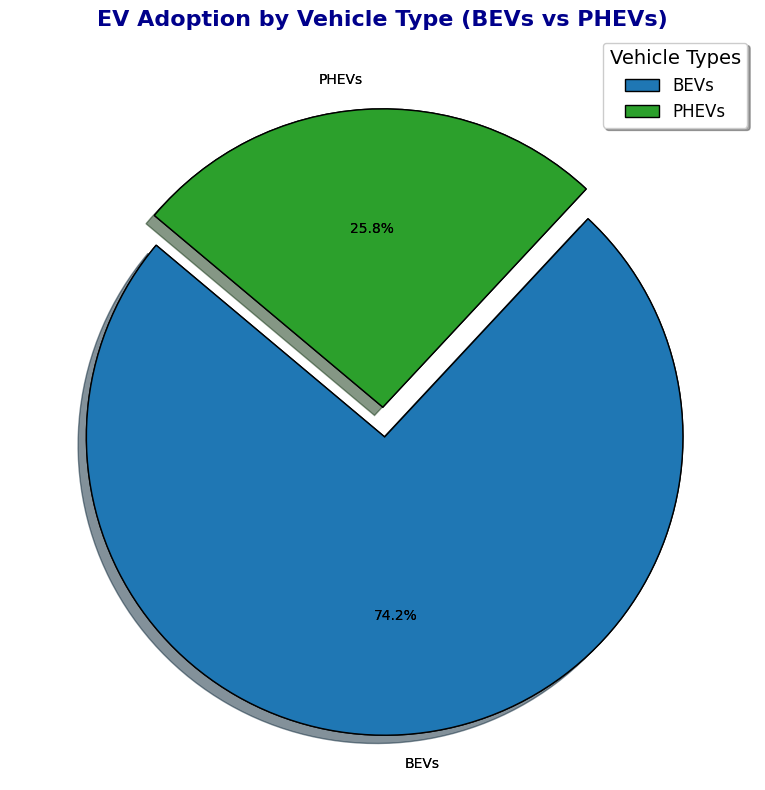

In [23]:
# First, I group the data by 'Vehicle Primary Use' to analyze the count of BEVs and PHEVs for different vehicle categories
vehicle_type_group = df1.groupby(['Vehicle Primary Use']).agg({
    'Battery Electric Vehicles (BEVs)': 'sum',  # Summing up the BEVs for each vehicle type
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'sum'  # Summing up the PHEVs for each vehicle type
}).reset_index()

# Now, I calculate the total number of BEVs and PHEVs across all vehicle types
total_bevs = vehicle_type_group['Battery Electric Vehicles (BEVs)'].sum()  # Total BEVs
total_phevs = vehicle_type_group['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()  # Total PHEVs

# For the pie chart, I define the labels and sizes based on the total BEVs and PHEVs
labels = ['BEVs', 'PHEVs']  # The categories for the pie chart
sizes = [total_bevs, total_phevs]  # The corresponding values for the categories
colors = ['#1f77b4', '#2ca02c']  # I choose a visually distinct color palette (blue for BEVs and green for PHEVs)
explode = (0.1, 0)  # I make the BEVs slice explode slightly to highlight it in the chart

# Next, I plot the pie chart
plt.figure(figsize=(8, 8))  # I adjust the figure size to make it visually appealing
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'})  # Basic pie chart with custom options

# I add a shadow effect to the pie chart for a 3D look
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=140, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'})  # Shadow for a 3D effect

# Now, I add a title to the plot with customized font properties
plt.title("EV Adoption by Vehicle Type (BEVs vs PHEVs)", fontsize=16, fontweight='bold', color='darkblue')

# I add a legend to the plot for better readability and understanding of the vehicle types
plt.legend(labels, loc='upper right', fontsize=12, title="Vehicle Types", title_fontsize=14, shadow=True)  # Customizing legend style

# I use tight_layout to ensure everything fits in the plot without overlap
plt.tight_layout()

# Finally, I save the plot as an image in the specified path
image_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution13.png"
plt.savefig(image_path, bbox_inches='tight')  # Saving the image with a tight bounding box to prevent clipping

# I show the plot to visualize it
plt.show()


Index(['Date', 'County', 'State', 'Vehicle Primary Use',
       'Battery Electric Vehicles (BEVs)',
       'Plug-In Hybrid Electric Vehicles (PHEVs)',
       'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
       'Total Vehicles', 'Percent Electric Vehicles', 'Year'],
      dtype='object')


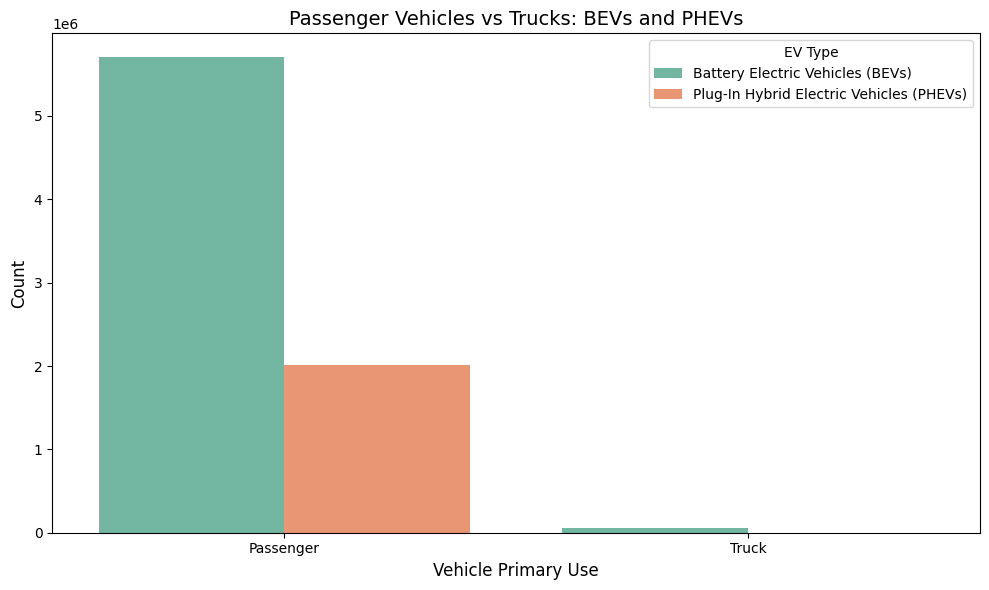

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First, I check the column names of the dataframe to ensure I have the correct fields for analysis
print(df1.columns)

# Now, I group the data by 'Vehicle Primary Use' and sum up the number of BEVs and PHEVs for each vehicle category
vehicle_use_counts = df1.groupby('Vehicle Primary Use')[['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)']].sum()

# I reset the index so that the 'Vehicle Primary Use' becomes a column again, making it easier to plot later
vehicle_use_counts.reset_index(inplace=True)

# To create a grouped bar plot, I melt the dataframe. This transforms the data to a long format where each row represents a count of BEVs or PHEVs
vehicle_use_melted = vehicle_use_counts.melt(id_vars='Vehicle Primary Use', var_name='EV Type', value_name='Count')

# Next, I create the bar plot with seaborn, using 'Vehicle Primary Use' for the x-axis, 'Count' for the y-axis, 
# and differentiating BEVs and PHEVs using the hue parameter.
plt.figure(figsize=(10, 6))  # I adjust the figure size for better readability
sns.barplot(data=vehicle_use_melted, x='Vehicle Primary Use', y='Count', hue='EV Type', palette='Set2')

# I add labels and a title to make the plot more informative
plt.title('Passenger Vehicles vs Trucks: BEVs and PHEVs', fontsize=14)
plt.xlabel('Vehicle Primary Use', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='EV Type', fontsize=10)  # I customize the legend title and font size

# I use tight_layout to make sure the plot elements fit within the figure
plt.tight_layout()

# Finally, I save the plot as an image in the specified path
image_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution14.png"
plt.savefig(image_path, bbox_inches='tight')  # Saving the plot with tight bounding to avoid clipping

# I display the plot so I can view the result
plt.show()




In [ ]:
# Filter the DataFrame for BEVs and PHEVs, then drop rows with missing electric range values
bev_ranges = df[df['ActualColumnName'] == 'BEV']['Electric Range'].dropna()
phev_ranges = df[df['ActualColumnName'] == 'PHEV']['Electric Range'].dropna()

Average Electric Range by Vehicle Type:
                    Electric Vehicle Type  Electric Range
0          Battery Electric Vehicle (BEV)       54.325924
1  Plug-in Hybrid Electric Vehicle (PHEV)       31.030350


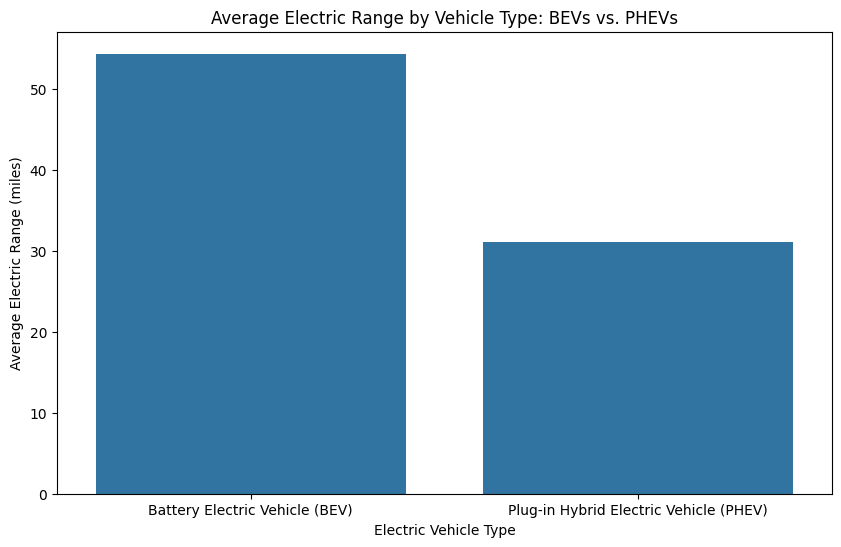

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, I filter the dataset to include only Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs).
# This way, I focus on these two specific types of electric vehicles.
df_filtered = df[df['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'])]

# Next, I calculate the average electric range for each vehicle type (BEVs and PHEVs).
# To do this, I group the data by 'Electric Vehicle Type' and compute the mean electric range.
average_range = df_filtered.groupby('Electric Vehicle Type')['Electric Range'].mean().reset_index()

# I print the average electric range for both BEVs and PHEVs to see the results
print("Average Electric Range by Vehicle Type:")
print(average_range)

# Now, I want to visualize this data, so I create a barplot.
# The barplot will show the average electric range for BEVs and PHEVs.
plt.figure(figsize=(10, 6))  # I set the figure size to make it more readable.
sns.barplot(x='Electric Vehicle Type', y='Electric Range', data=average_range)

# I add a title and labels to make the plot clearer and more informative.
plt.title('Average Electric Range by Vehicle Type: BEVs vs. PHEVs')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Average Electric Range (miles)')

# Before displaying the plot, I save it as an image file in a specific location.
image_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution18.png"
plt.savefig(image_path, bbox_inches='tight')  # I use 'bbox_inches' to avoid cutting off labels.

# Finally, I display the plot to see the result.
plt.show()




In [63]:
import scipy.stats as stats

# I filter the data for BEVs and PHEVs separately to compare their electric range
bev_ranges = df_filtered[df_filtered['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Electric Range'].dropna()
phev_ranges = df_filtered[df_filtered['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']['Electric Range'].dropna()

# I perform a t-test to compare the electric ranges of BEVs and PHEVs
# The t-test checks if the means of these two groups are significantly different
t_stat, p_value = stats.ttest_ind(bev_ranges, phev_ranges)

# I print out the t-test results for BEVs vs PHEVs
print("\n=== T-test: BEVs vs PHEVs ===")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

# I interpret the p-value to determine if there is a significant difference between BEVs and PHEVs
if p_value < 0.05:
    print("Conclusion: Significant difference between BEVs and PHEVs.")
else:
    print("Conclusion: No significant difference between BEVs and PHEVs.")

# Now, I compare Tesla and Nissan electric ranges using the t-test.
# First, I filter the data to get electric ranges for Tesla and Nissan
tesla_ranges = df_filtered[df_filtered['Make'] == 'Tesla']['Electric Range'].dropna()
nissan_ranges = df_filtered[df_filtered['Make'] == 'Nissan']['Electric Range'].dropna()

# I perform a t-test to compare the electric ranges of Tesla and Nissan
t_stat, p_value = stats.ttest_ind(tesla_ranges, nissan_ranges)

# I print out the t-test results for Tesla vs Nissan
print("\n=== T-test: Tesla vs Nissan ===")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

# I interpret the p-value to determine if there is a significant difference between Tesla and Nissan
if p_value < 0.05:
    print("Conclusion: Significant difference between Tesla and Nissan.")
else:
    print("Conclusion: No significant difference between Tesla and Nissan.")



=== T-test: BEVs vs PHEVs ===
T-Statistic: 51.567, P-Value: 0.000
Conclusion: Significant difference between BEVs and PHEVs.

=== T-test: Tesla vs Nissan ===
T-Statistic: -9.191, P-Value: 0.000
Conclusion: Significant difference between Tesla and Nissan.


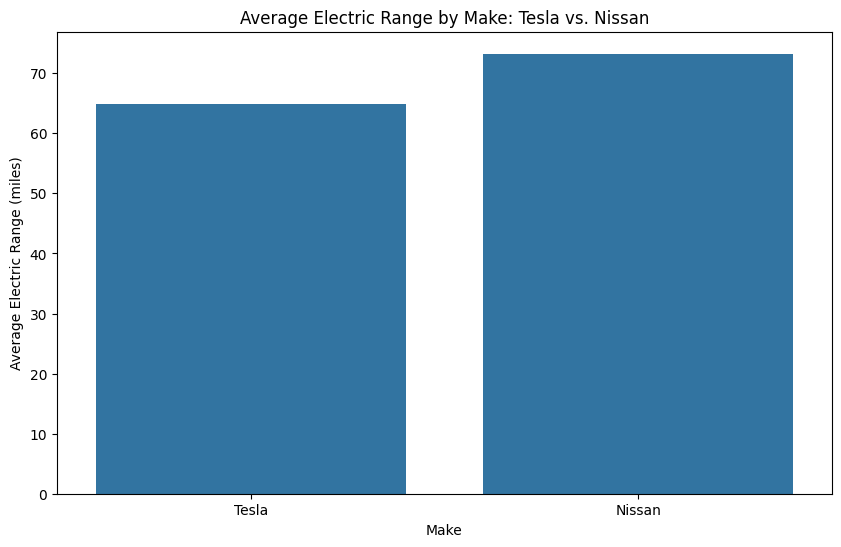

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# I assume that the average electric range for Tesla and Nissan has already been calculated
# These values should come from the earlier analysis or calculations
# For instance:
# tesla_avg_range = tesla_ranges.mean()
# nissan_avg_range = nissan_ranges.mean()

# Create a barplot to visualize the average electric range for Tesla and Nissan
plt.figure(figsize=(10, 6))  # I specify the figure size to make the plot clear and readable
sns.barplot(x=['Tesla', 'Nissan'], y=[tesla_avg_range, nissan_avg_range])  # I create the barplot for both Tesla and Nissan

# I add a title to the plot to give context
plt.title('Average Electric Range by Make: Tesla vs. Nissan')

# I label the axes to indicate what they represent
plt.xlabel('Make')
plt.ylabel('Average Electric Range (miles)')

# I save the plot to a file in my specified directory
image_path = r"D:\Course materials\My Projects\Milestone Project 1\vehicle_type_distribution19.png"
plt.savefig(image_path, bbox_inches='tight')

# I show the plot
plt.show()
